# 1. Time Series Decomposition


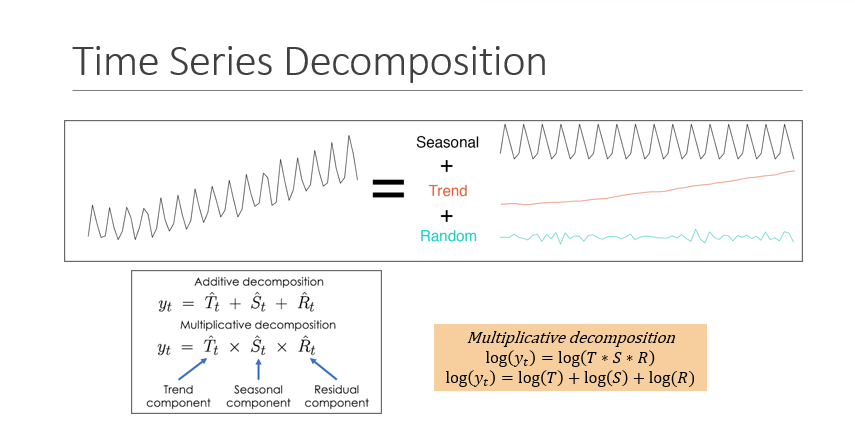

In [1]:
%pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.7 MB/s eta 0:00:00


### Step 1 - Data Ingestion


In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv"
url

'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv'

In [6]:
import pandas as pd

# df = pd.read_csv(url) # Commenting this out as we need Month as index
df = pd.read_csv(url, index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### yyyy-mm-dd is the default time format in pnadas


### Step 2 - Perform Basic Data Quality Checks

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Note: We can convert the date component into other frequencies if required

1. Year
2. Quarter
3. Month
4. Day

In [8]:
df.resample("YE").sum() # YE = Year End

,Passengers
Month,
1949-12-31,1520
1950-12-31,1676
1951-12-31,2042
1952-12-31,2364
1953-12-31,2700
1954-12-31,2867
1955-12-31,3408
1956-12-31,3939
1957-12-31,4421


In [10]:
df.resample("YE").median()

,Passengers
Month,
1949-12-31,125.0
1950-12-31,137.5
1951-12-31,169.0
1952-12-31,192.0
1953-12-31,232.0
1954-12-31,231.5
1955-12-31,272.0
1956-12-31,315.0
1957-12-31,351.5


In [11]:
df.resample("QE").sum() # Quarterend

,Passengers
Month,
1949-03-31,362
1949-06-30,385
1949-09-30,432
1949-12-31,341
1950-03-31,382
1950-06-30,409
1950-09-30,498
1950-12-31,387
1951-03-31,473


In [12]:
df.resample("QE").mean()

,Passengers
Month,
1949-03-31,120.666667
1949-06-30,128.333333
1949-09-30,144.000000
1949-12-31,113.666667
1950-03-31,127.333333
1950-06-30,136.333333
1950-09-30,166.000000
1950-12-31,129.000000
1951-03-31,157.666667


In [13]:
pd.to_datetime("03/12/2021")

Timestamp('2021-03-12 00:00:00')

### Visualize the time series

In [14]:
import matplotlib.pyplot as plt


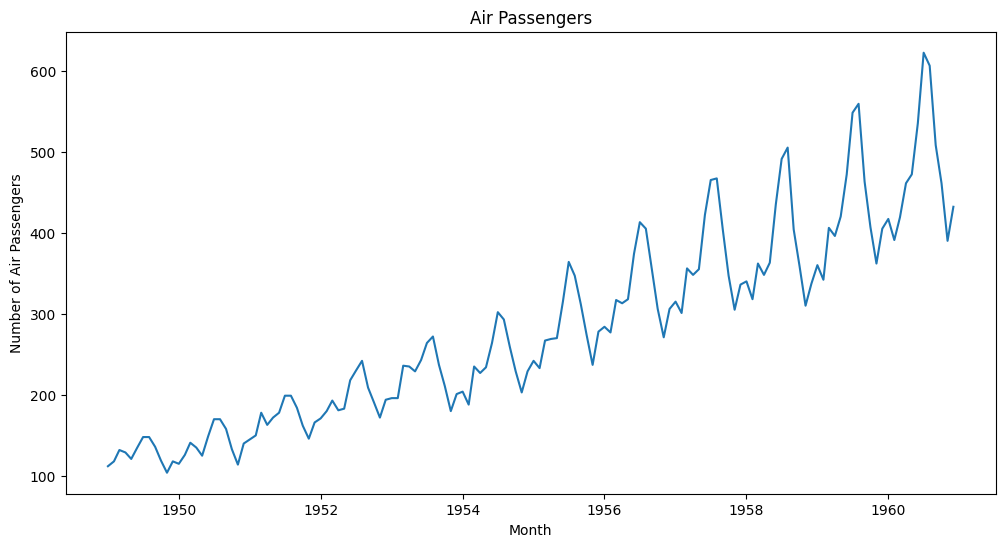

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df["Passengers"])
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.title("Air Passengers")
plt.show()

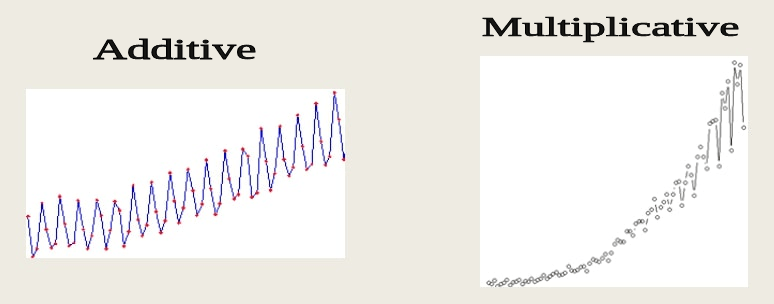

### Time Series Decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

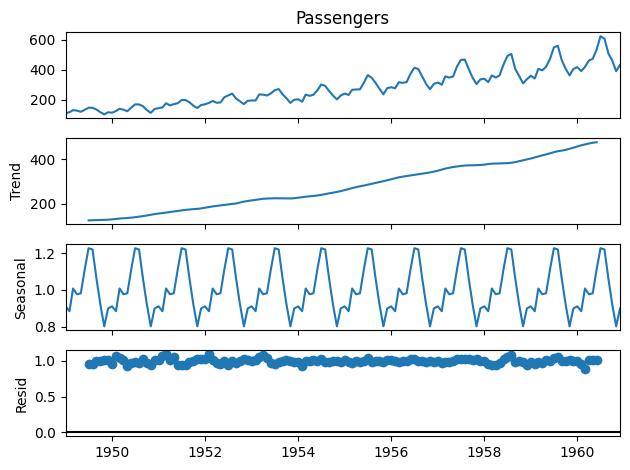

In [18]:
s = seasonal_decompose(df["Passengers"], model="mul")
s.plot()
plt.show()

### Trend of Time Series

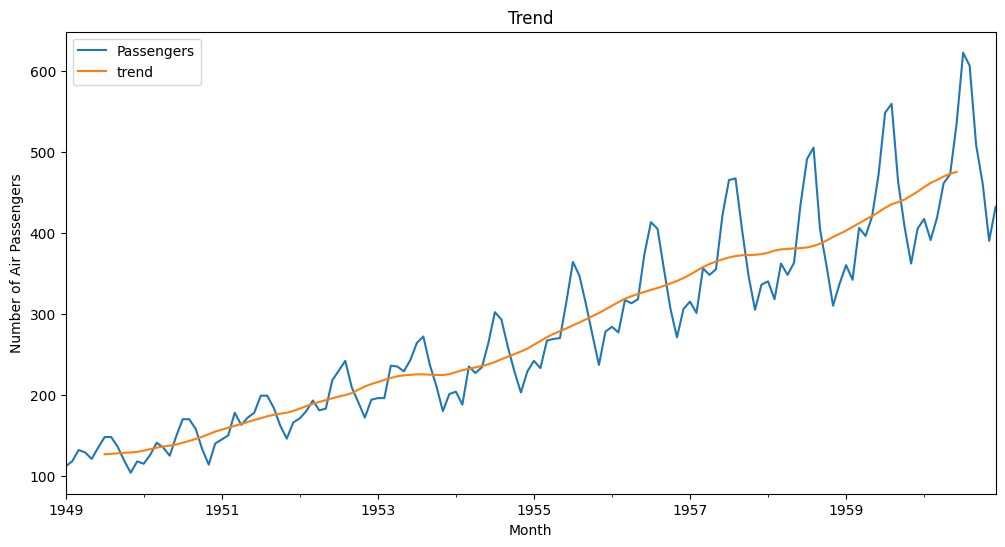

In [19]:
plt.figure(figsize=(12,6))
s.observed.plot()
s.trend.plot()
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.title("Trend")
plt.legend()
plt.show()

### Seasonality

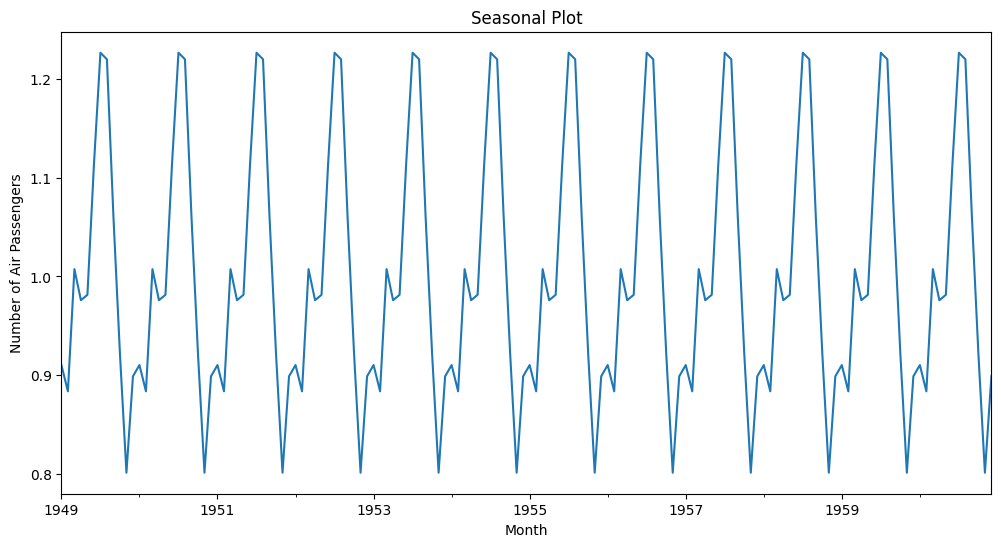

In [20]:
plt.figure(figsize=(12,6))
s.seasonal.plot()
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.title("Seasonal Plot")
plt.show()

### Residuals

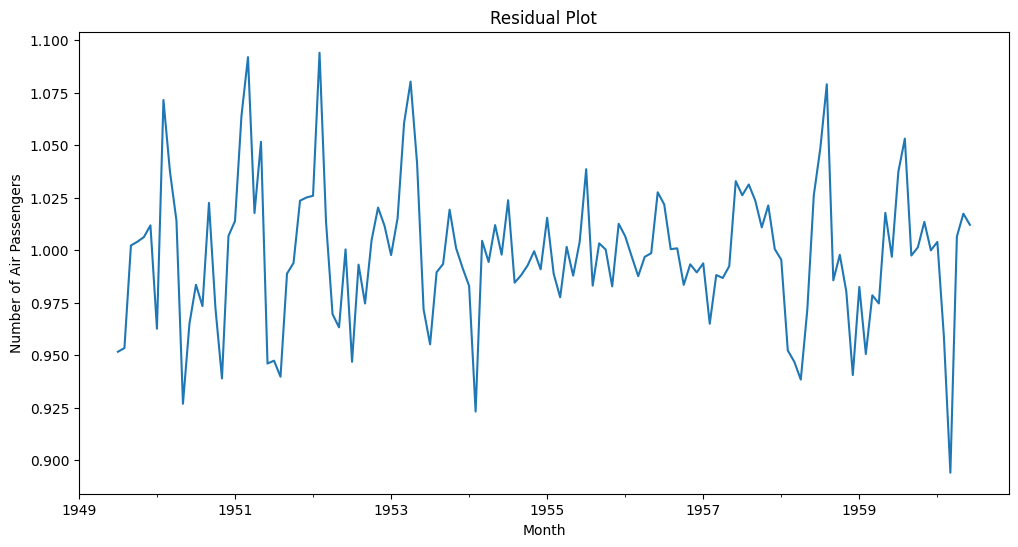

In [21]:
plt.figure(figsize=(12,6))
s.resid.plot()
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.title("Residual Plot")
plt.show()

### Additive y = Trend + Season + Residuals

### Multiplicative y = Trend x Season x Residual

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

[]

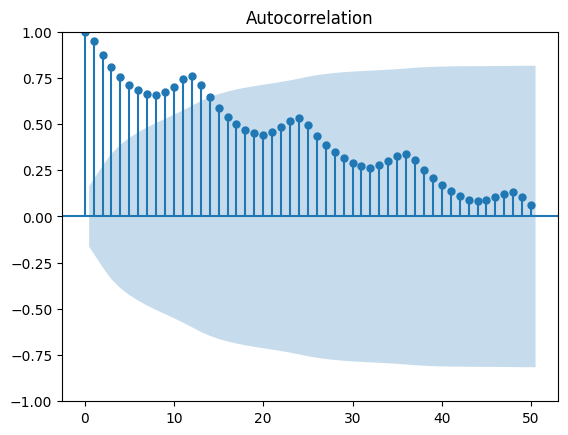

In [23]:
plot_acf(df["Passengers"], lags=50)
plt.plot()

[]

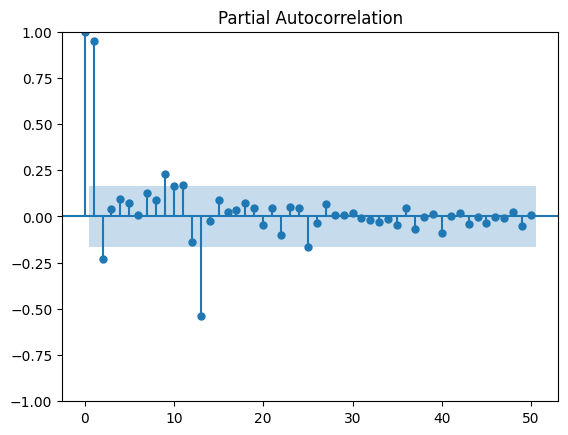

In [24]:
plot_pacf(df["Passengers"], lags=50)
plt.plot()

### Time Series Forecasting

In [25]:
from warnings import filterwarnings
filterwarnings("ignore")

In [26]:
from pmdarima.arima import auto_arima

In [27]:
model = auto_arima(df["Passengers"], seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.24 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.83 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.37 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=2.87 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.36 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.30 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.72 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.68 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.45 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.09 sec
 ARIMA(3,1,1)(0,1,0

In [28]:
model.order

(2, 1, 1)

### Forecast values for next 3 years
months = 3*12 = 36 months

In [29]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [30]:
n=3
months = n*12
months

36

In [31]:
forecast, conf = model.predict(n_periods=months, return_conf_int=True)

In [32]:
forecast

,0
1961-01-01,445.634934
1961-02-01,420.395024
1961-03-01,449.198348
1961-04-01,491.839976
1961-05-01,503.394502
1961-06-01,566.862471
1961-07-01,654.260189
1961-08-01,638.597493
1961-09-01,540.883739
1961-10-01,494.126610


In [33]:
type(forecast)

pandas.core.series.Series

In [34]:
conf

array([[423.34484757, 467.92501952],
       [394.23539679, 446.55465213],
       [419.83171141, 478.56498452],
       [460.37625926, 523.30369276],
       [470.38045292, 536.40855182],
       [532.69931939, 601.02562216],
       [619.22112948, 689.29924892],
       [602.87983183, 674.31515457],
       [504.63120707, 577.13627077],
       [457.44583825, 530.80738157],
       [386.30372821, 460.36165208],
       [428.1911891 , 502.82391072],
       [433.49735818, 525.08434836],
       [405.10869698, 503.24497681],
       [431.1554372 , 535.01852521],
       [471.84033434, 579.79816045],
       [481.87334967, 593.02801195],
       [544.15634767, 657.81146303],
       [630.60850683, 746.26548123],
       [614.17889589, 731.46366422],
       [515.83210925, 634.46267142],
       [468.54379213, 588.30438119],
       [397.29693225, 518.02080357],
       [439.07958457, 560.63657678],
       [446.3268565 , 580.99723894],
       [418.31792814, 558.81320108],
       [444.62395763, 590.35721439],
 

In [35]:
df_forecast = forecast.to_frame()
type(df_forecast)

pandas.core.frame.DataFrame

In [36]:
df_forecast.columns = ["Forecast"]
df_forecast

,Forecast
1961-01-01,445.634934
1961-02-01,420.395024
1961-03-01,449.198348
1961-04-01,491.839976
1961-05-01,503.394502
1961-06-01,566.862471
1961-07-01,654.260189
1961-08-01,638.597493
1961-09-01,540.883739
1961-10-01,494.126610


In [38]:
df_forecast[["Lower","Upper"]] = conf

In [39]:
df_forecast

,Forecast,Lower,Upper
1961-01-01,445.634934,423.344848,467.925020
1961-02-01,420.395024,394.235397,446.554652
1961-03-01,449.198348,419.831711,478.564985
1961-04-01,491.839976,460.376259,523.303693
1961-05-01,503.394502,470.380453,536.408552
1961-06-01,566.862471,532.699319,601.025622
1961-07-01,654.260189,619.221129,689.299249
1961-08-01,638.597493,602.879832,674.315155
1961-09-01,540.883739,504.631207,577.136271
1961-10-01,494.126610,457.445838,530.807382


In [40]:
df_forecast = df_forecast.round(0).astype(int)
df_forecast

,Forecast,Lower,Upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


In [43]:
df_forecast.index.name = "Month"

In [44]:
df_forecast.head()

,Forecast,Lower,Upper
Month,,,
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536


In [45]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [46]:
df_forecast.to_csv("Forecast.csv")

### Visualize the forecast

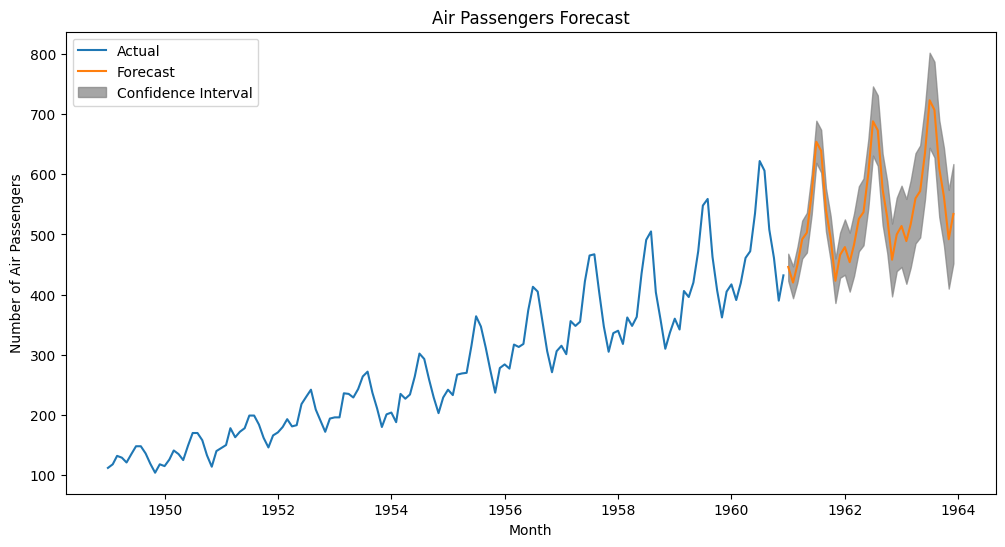

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df["Passengers"], label="Actual")
plt.plot(df_forecast["Forecast"], label="Forecast")
plt.fill_between(df_forecast.index, df_forecast["Lower"],
                 df_forecast["Upper"], color="gray", alpha=0.7,
                 label="Confidence Interval")

plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.title("Air Passengers Forecast")
plt.legend()
plt.show()